# Perlin noise-based classifier


## Description
The proposed Perlin noise-based classifier is a supervised binary classifier that is intended to use genetic algorithms (or other suitable means for optimization) to evolve a set of parameters in order to match the landscape generated by an n-dimensional Perlin noise with that of a given problem, so that values below a threshold represent one class and values above that threshold represent the other class.

Given a binary classification problem for which the inputs represent a vector with n numerical values, the parameters that constitute the solution are the following:
 - seed: number - random number generator for noise, can be used for a strong mutation of the solution
 - octaves: number - positive integer representing the number of Perlin Noise layers (or turbulence), can be used for finer details in map
 - threshold: number in interval [0,1] - threshold for classification
 - scale1: number - scaling factor across first noise dimension
 - offset1: number - offset term across first noise dimension
 - ...
 - scaleN: number - scaling factor across n-th noise dimension
 - offsetN: number - offset term across n-th noise dimension
 - zOffset: number - offset term across (n+1)-th noise dimension, an additional dimension used to sample a slice with features continuous in this dimension, used for weak mutation of the solution

 Other parameters can be added in order to manipulate the noise, such as rotation or turbulence.

Inputs will then be classified by calculating the value of the Perlin noise in the point represented by the individual's input vector, which should return a value loosely constrained in [0, 1], depending on Perlin noise implementation. This value will be compared with the threshold in order to determine the class.

## Intuitive example

Considering the XOR problem, two possible solutions for input classification are as follows:

<img style="vertical-align: middle; margin: 10px;" width="321" height="321" src="example1.png"> <img style="vertical-align: middle; margin: 10px;" width="321" height="321" src="example2.png"> 

As it can be observed, given that the XOR problem takes two boolean values (which can be expressed as either 0 or 1), a noise with at least 2 dimensions can be used. An additional dimension could allow the manipulation of a free term used to slice the generated noise with the intent of generating solutions with similar features, continuous in said dimension.

An example of the behavior explained above is given at

https://necessarydisorder.wordpress.com/2017/11/15/drawing-from-noise-and-then-making-animated-loopy-gifs-from-there/

![tuto2](tuto2.webp)

To begin with the implementation, I will be using ``perlin_noise`` for Perlin noise implementation, as it offers in-built octave support and noise layering, and ``matplotlib.pyplot`` in order to draw plots of corresponding solutions

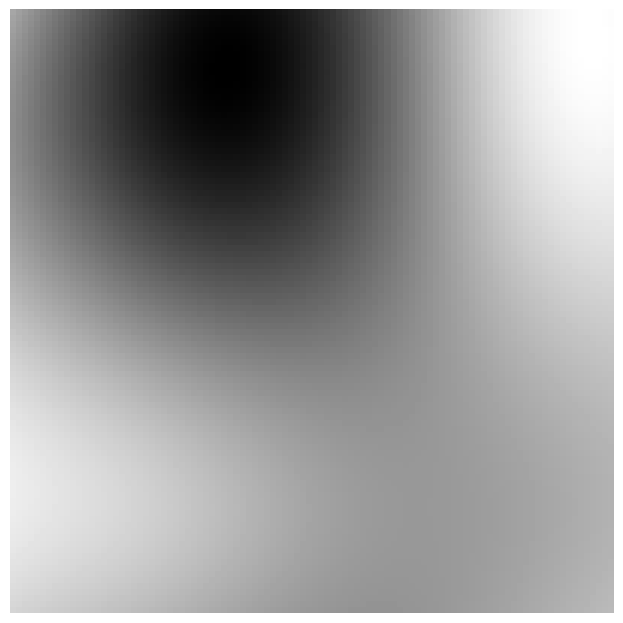

In [9]:
noise = PerlinNoise(octaves=1, seed=5)
xpix, ypix = 100, 100
threshold = 0
scale = [0.8, 1]
offset = [0.2, 0.1]
pic = [[noise([i/xpix * scale[0] + offset[0], j/ypix * scale[1] + offset[1]]) for j in range(xpix, 0, -1)] for i in range(ypix)]

plt.figure(figsize=(8,8), dpi=100)
plt.axis('off')
plt.imshow(pic, cmap='gray')
plt.show()

We then apply a threshold to obtain classes

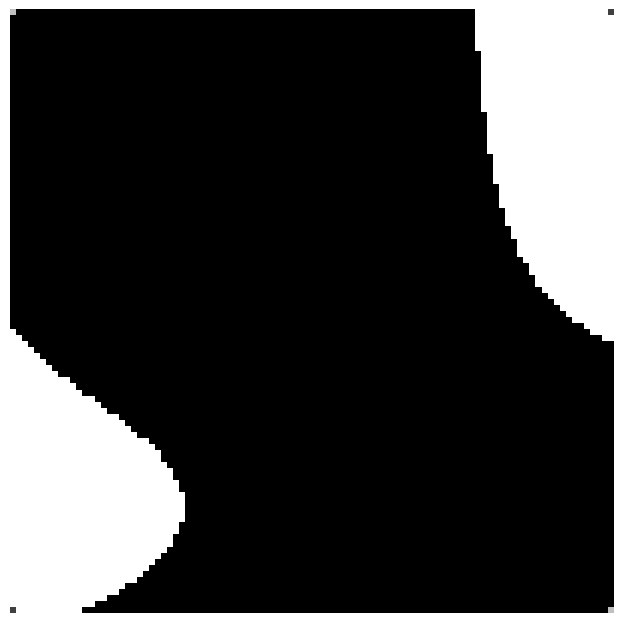

In [34]:
pic = [[noise([i/xpix * scale[0] + offset[0], j/ypix * scale[1] + offset[1]]) > threshold for j in range(xpix, 0, -1)] for i in range(ypix)]

pic[0][0] = 0.75
pic[0][ypix - 1] = 0.25
pic[xpix - 1][ypix - 1] = 0.75
pic[xpix-1][0] = 0.25

plt.figure(figsize=(8,8), dpi=100)
plt.axis('off')
plt.imshow(pic, cmap='gray')
plt.show()

Once trained, such a model should be trivial to query for the class label of a given input

In [28]:
inputs = [(0,0), (0,1), (1,0), (1,1)]
maxY = max([input[1] for input in inputs])
processedInputs = []
for input in inputs:
    x = input[0] * scale[0] + offset[0]
    y = (maxY - input[1]) * scale[1] + offset[1]
    processedInputs.append((x, y))
results = [noise(input) > threshold for input in processedInputs]

assert(results[0] == 0)
assert(results[1] == 1)
assert(results[2] == 1)
assert(results[3] == 0)